In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Parameter

In [2]:
# Parameter Messschaltung
fs = 18000.0                     # Sampling rate            [Samples/Sec]
T = 20e-3                        # Periode                              [s]
z = 2.0                          # Number of periods to calculate       [-]
N = fs*T*z                       # Number of samples per window         [-]
F = 50                           # Base frequency                      [Hz]
t = np.arange(0,z*T,(1/fs))      # Time vector                          [s]
w = 2*np.pi*F

In [3]:
# Magnitudes of the fundamental component and harmonics
V1 = 100
V3 = 8
V5 = 15
V7 = 5

I1 = 100
I3 = 20
I5 = 15
I7 = 10

# Angles of the fundamental component and harmonics
phiv1=np.deg2rad(0)
phiv3=np.deg2rad(-70)
phiv5=np.deg2rad(140)
phiv7=np.deg2rad(20)

phii1=np.deg2rad(-30)
phii3=np.deg2rad(-165)
phii5=np.deg2rad(233)
phii7=np.deg2rad(288)

In [4]:
# Instantaneous values
v1=np.sqrt(2) * V1 * np.sin(1*w*t + phiv1)
v3=np.sqrt(2) * V3 * np.sin(3*w*t + phiv3)
v5=np.sqrt(2) * V5 * np.sin(5*w*t + phiv5)
v7=np.sqrt(2) * V7 * np.sin(7*w*t + phiv7)
v=v1+v3+v5+v7

i1=np.sqrt(2) * I1 * np.sin(1*w*t + phii1)
i3=np.sqrt(2) * I3 * np.sin(3*w*t + phii3)
i5=np.sqrt(2) * I5 * np.sin(5*w*t + phii5)
i7=np.sqrt(2) * I7 * np.sin(7*w*t + phii7)
i=i1+i3+i5+i7;

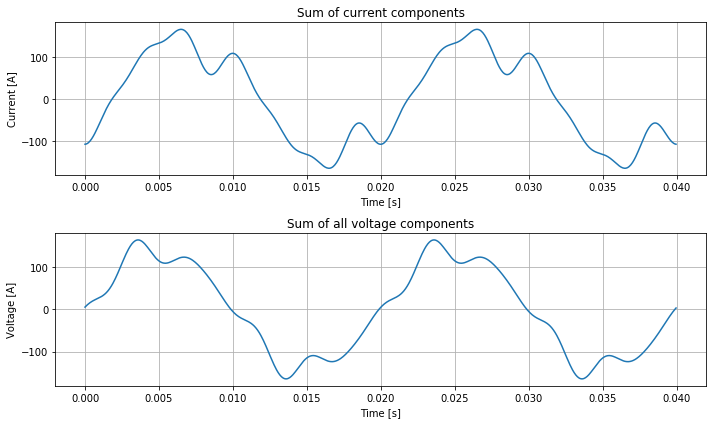

In [5]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(t,i);
plt.title('Sum of current components')
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.grid()

plt.subplot(212)
plt.plot(t,v);
plt.title('Sum of all voltage components')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [A]')
plt.grid()

plt.tight_layout()
plt.show()

### Theoretical Calculations according to IEEE 1459

In [6]:
# theoretical RMS, calculated from magnitudes
V=np.sqrt(V1**2+V3**2+V5**2+V7**2)
I=np.sqrt(I1**2+I3**2+I5**2+I7**2)
print('Theoretical Voltage_RMS: {}'.format(V))
print('Theoretical Current_RMS: {}'.format(I))
#actual RMS, calculated from signals
V_RMS=np.sqrt(1/len(t)*np.sum(np.dot(v,v)))
I_RMS=np.sqrt(1/len(t)*np.sum(np.dot(i,i)))
print('Calculated Voltage_RMS: {}'.format(V_RMS))
print('Calculated Current_RMS: {}'.format(I_RMS))

Theoretical Voltage_RMS: 101.55786527886454
Theoretical Current_RMS: 103.56157588603989
Calculated Voltage_RMS: 101.55786527886454
Calculated Current_RMS: 103.5615758860399


In [7]:
# Fundamental active power (W) 3.1.2.4
P1=1/len(t)*np.sum(np.dot(v1,i1))
P3=1/len(t)*np.sum(np.dot(v3,i3))
P5=1/len(t)*np.sum(np.dot(v5,i5))
P7=1/len(t)*np.sum(np.dot(v7,i7))
tmp = [P1,P3,P5,P7]
for k in range(0,4):
    print('Fundamental Active Power P{}: {}'.format(k*2+1,tmp[k]))

Fundamental Active Power P1: 8660.254037844388
Fundamental Active Power P3: -13.944918839625275
Fundamental Active Power P5: -11.775590154662583
Fundamental Active Power P7: -1.7449748351251388


In [8]:
# Fundamental reactive power (var) 3.1.2.6
Q1=V1*I1*np.sin(phiv1-phii1)
Q3=V3*I3*np.sin(phiv3-phii3)
Q5=V5*I5*np.sin(phiv5-phii5)
Q7=V7*I7*np.sin(phiv7-phii7)
tmp = [Q1,Q3,Q5,Q7]
for k in range(0,4):
    print('Fundamental Reactive Power Q{}: {}'.format(k*2+1,tmp[k]))

Fundamental Reactive Power Q1: 4999.999999999999
Fundamental Reactive Power Q3: 159.39115169467928
Fundamental Reactive Power Q5: -224.6916453197791
Fundamental Reactive Power Q7: 49.969541350954785


In [9]:
# Cross distortion powers
D13=V1 * I3
D15=V1 * I5
D17=V1 * I7
D31=V3 * I1
D51=V5 * I1
D71=V7 * I1

D35=V3 * I5
D37=V3 * I7
D53=V5 * I3
D57=V5 * I7
D73=V7 * I3
D75=V7 * I5

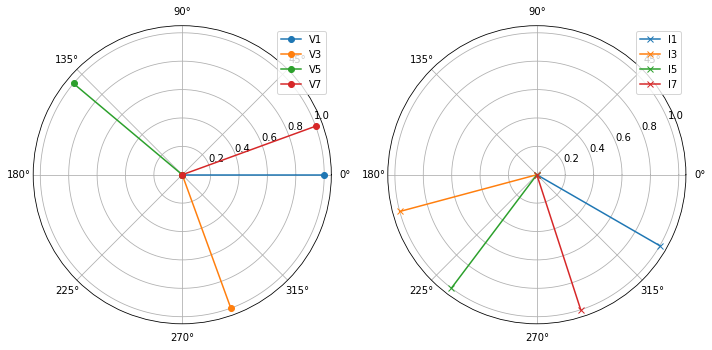

In [10]:
plt.figure(figsize=(10,6))
V1_phasor=V1*np.exp(1j*phiv1)
V3_phasor=V3*np.exp(1j*phiv3)
V5_phasor=V5*np.exp(1j*phiv5)
V7_phasor=V7*np.exp(1j*phiv7)

I1_phasor=I1*np.exp(1j*phii1)
I3_phasor=I3*np.exp(1j*phii3)
I5_phasor=I5*np.exp(1j*phii5)
I7_phasor=I7*np.exp(1j*phii7)

plt.subplot(121, polar=True)
plt.polar([0,np.angle(V1_phasor)],[0,1],marker='o',label='V1')
plt.polar([0,np.angle(V3_phasor)],[0,1],marker='o',label='V3')
plt.polar([0,np.angle(V5_phasor)],[0,1],marker='o',label='V5')
plt.polar([0,np.angle(V7_phasor)],[0,1],marker='o',label='V7')
plt.tight_layout()
plt.legend()
plt.subplot(122, polar=True)
plt.polar([0,np.angle(I1_phasor)],[0,1],marker='x',label='I1')
plt.polar([0,np.angle(I3_phasor)],[0,1],marker='x',label='I3')
plt.polar([0,np.angle(I5_phasor)],[0,1],marker='x',label='I5')
plt.polar([0,np.angle(I7_phasor)],[0,1],marker='x',label='I7')
plt.tight_layout()
plt.legend()
plt.show()

In [11]:
# Total Active Power
P=P1+P3+P5+P7

# Harmonic active power (nonfundamental active power) (W) 3.1.2.5
PH=P-P1 

# Reactive power (Budenau definition) (not used in 1459)
QB=Q1+Q3+Q5+Q7; 

# Total voltage harmonic distortion (THDV) 3.1.2.1
THDV=np.sqrt( (V/V1)**2-1 )

# Total current harmonic distortion (THDI) 3.1.2.1
THDI=np.sqrt( (I/I1)**2-1 )

# Apparent power (VA) 3.1.2.7
S=V*I

# Fundamental apparent power (VA) 3.1.2.8
S1=V1*I1

# Nonfundamental apparent power (VA) 3.1.2.9
SN=np.sqrt(S**2-S1**2)

# Current distortion power (var) 3.1.2.10
DI=S1*THDI

# Voltage distortion power (var) 3.1.2.11
DV=S1*THDV

#Harmonic apparent power (VA) 3.1.2.12
SH=S1*THDI*THDV

# Harmonic distortion power (var)
DH=np.sqrt(SH**2-PH**2)

# Fundamental power factor 3.1.2.15
PF1=P1/S1

# Power factor 3.1.2.16
PF=P/S


# Print values:
print('Total Active Power [W]: {}'.format(P))
print('Harmonic active power [W]: {}'.format(PH))
print('Reactive power (Budenau definition): {}'.format(QB))
print('Total voltage harmonic distortion (THDV): {}'.format(THDV))
print('Total current harmonic distortion (THDI): {}'.format(THDI))
print('Apparent power [VA]: {}'.format(S))
print('Fundamental apparent power [VA]: {}'.format(S1))
print('Nonfundamental apparent power [VA]: {}'.format(SN))
print('Current distortion power [var]: {}'.format(DI))
print('Voltage distortion power [var]: {}'.format(DV))
print('Harmonic apparent power [VA]: {}'.format(SH))
print('Harmonic distortion power [var]: {}'.format(DH))
print('Fundamental power factor [-]: {}'.format(PF1))
print('Power factor [-]: {}'.format(PF))

Total Active Power [W]: 8632.788554014976
Harmonic active power [W]: -27.465483829411824
Reactive power (Budenau definition): 4984.6690477258535
Total voltage harmonic distortion (THDV): 0.17720045146669378
Total current harmonic distortion (THDI): 0.26925824035672524
Apparent power [VA]: 10517.492571901346
Fundamental apparent power [VA]: 10000
Nonfundamental apparent power [VA]: 3258.4735690197026
Current distortion power [var]: 2692.5824035672526
Voltage distortion power [var]: 1772.0045146669377
Harmonic apparent power [VA]: 477.1268175233926
Harmonic distortion power [var]: 476.3356455253135
Fundamental power factor [-]: 0.8660254037844388
Power factor [-]: 0.8208029142876158


### Calculation with 90°-Shift

In [12]:
# RMS of current and voltage
Irms_Shift = np.sqrt(np.mean(np.square(i[0:int(N/2)])))

Urms_Shift =  np.sqrt(np.mean(np.square(v[0:int(N/2)])))

# Active and reactive power
P_Shift = np.dot(v[0:int(N/2)],i[0:int(N/2)])/int(N/2)
Q_Shift = np.dot(v[0:int(N/2)],i[int(N/8):int(N/2)+int(N/8)])/int(N/2)

# Apparent power CAVEAT: Only valid for sinusoidal currents and voltages!!
S_Shift = Urms_Shift * Irms_Shift

print("Urms = %0.4f [V]" % Urms_Shift)
print("Irms = %0.4f [A]" % Irms_Shift)
print("P = %0.4g [W]" % P_Shift)
print("S = %0.4f [Var]" % S_Shift)
print("Q = %0.4f [VA]" % Q_Shift)
print("D = {}".format(np.sqrt(S_Shift**2 - P_Shift**2 - Q_Shift**2)))

Urms = 101.5579 [V]
Irms = 103.5616 [A]
P = 8633 [W]
S = 10517.4926 [Var]
Q = 4565.9477 [VA]
D = 3904.450503320754


## Calculations via FFT

In [13]:
# Fourier transformation
i_fft = np.fft.rfft(i)
v_fft = np.fft.rfft(v)

# Calculate magnitude and scale harmonics
i_fft_rms_n = np.abs(i_fft)*2/len(i)/np.sqrt(2)
i_fft_rms_n[0] = i_fft_rms_n[0]*np.sqrt(2)/2
v_fft_rms_n = np.abs(v_fft)*2/len(v)/np.sqrt(2)
v_fft_rms_n[0] = v_fft_rms_n[0]*np.sqrt(2)/2

# Calculate RMS of current and voltage
V_fft_rms = np.sqrt(np.dot(v_fft_rms_n,v_fft_rms_n))
I_fft_rms = np.sqrt(np.dot(i_fft_rms_n,i_fft_rms_n))



# Correct phase angle (multiply by j) because the reference of the FFT is a cosine but our reference is 
# the voltage (sine)
i_fft_angle = np.angle(i_fft*(1j))
v_fft_angle = np.angle(v_fft*(1j))

theta_n  = (v_fft_angle-i_fft_angle)

P_FFT_n = v_fft_rms_n*i_fft_rms_n*np.cos(theta_n)
Q_FFT_n = v_fft_rms_n*i_fft_rms_n*np.sin(theta_n)


In [14]:
# Calculate all relevant components

# DC Active Power
P0_FFT = P_FFT_n[0]

# Total Active Power [W]
P_FFT = np.sum(P_FFT_n)

# Reactive power (Budenau definition) [var]
QB_FFT = np.sum(Q_FFT_n)

# Fundamental Active Power [W]
P1_FFT = P_FFT_n[int(F/(fs/N))] 

# Harmonic active power [P]
PH_FFT = P_FFT - P1_FFT

# Total voltage harmonic distortion (THDV)
THDV_FFT = np.sqrt( (V_fft_rms/v_fft_rms_n[int(F/(fs/N))])**2-1)

# Total current harmonic distortion (THDI)
THDI_FFT = np.sqrt( (I_fft_rms/i_fft_rms_n[int(F/(fs/N))])**2-1)

# Apparent power (VA)
S_FFT = V_fft_rms * I_fft_rms

# Fundamental apparent power (VA) 3.1.2.8
S1_FFT = v_fft_rms_n[int(F/(fs/N))] * i_fft_rms_n[int(F/(fs/N))]

# Nonfundamental apparent power (VA) 3.1.2.9
SN_FFT = np.sqrt(S_FFT**2-S1_FFT**2)

# Current distortion power (var) 3.1.2.10
DI_FFT = S1_FFT * THDI_FFT

# Voltage distortion power (var) 3.1.2.11
DV_FFT = S1_FFT * THDV_FFT

# Harmonic apparent power (VA) 3.1.2.12
SH_FFT = S1_FFT * THDI_FFT * THDV_FFT

# Harmonic distortion power (var)
DH_FFT = np.sqrt(SH_FFT**2-PH_FFT**2)

# Fundamental power factor 3.1.2.15
PF1_FFT = P1_FFT / S1_FFT

# Power factor 3.1.2.16
PF_FFT = P_FFT / S_FFT

# Print values:
print('Total Active Power [W]: {}'.format(P_FFT))
print('Harmonic active power [W]: {}'.format(PH_FFT))
print('Reactive power (Budenau definition): {}'.format(QB_FFT))
print('Total voltage harmonic distortion (THDV): {}'.format(THDV_FFT))
print('Total current harmonic distortion (THDI): {}'.format(THDI_FFT))
print('Apparent power [VA]: {}'.format(S_FFT))
print('Fundamental apparent power [VA]: {}'.format(S1_FFT))
print('Nonfundamental apparent power [VA]: {}'.format(SN_FFT))
print('Current distortion power [var]: {}'.format(DI_FFT))
print('Voltage distortion power [var]: {}'.format(DV_FFT))
print('Harmonic apparent power [VA]: {}'.format(SH_FFT))
print('Harmonic distortion power [var]: {}'.format(DH_FFT))
print('Fundamental power factor [-]: {}'.format(PF1_FFT))
print('Power factor [-]: {}'.format(PF_FFT))

Total Active Power [W]: 8632.78855401497
Harmonic active power [W]: -27.465483829413643
Reactive power (Budenau definition): 4984.669047725852
Total voltage harmonic distortion (THDV): 0.17720045146669378
Total current harmonic distortion (THDI): 0.269258240356726
Apparent power [VA]: 10517.49257190134
Fundamental apparent power [VA]: 9999.999999999995
Nonfundamental apparent power [VA]: 3258.4735690197003
Current distortion power [var]: 2692.5824035672586
Voltage distortion power [var]: 1772.0045146669368
Harmonic apparent power [VA]: 477.1268175233937
Harmonic distortion power [var]: 476.3356455253145
Fundamental power factor [-]: 0.8660254037844387
Power factor [-]: 0.8208029142876155


In [15]:
print('Delta Total Active Power [W]: {}'.format(P-P_FFT))
print('Delta Harmonic active power [W]: {}'.format(PH-PH_FFT))
print('Delta Reactive power (Budenau definition): {}'.format(QB-QB_FFT))
print('Delta Total voltage harmonic distortion (THDV): {}'.format(THDV-THDV_FFT))
print('Delta Total current harmonic distortion (THDI): {}'.format(THDI-THDI_FFT))
print('Delta Apparent power [VA]: {}'.format(S-S_FFT))
print('Delta Fundamental apparent power [VA]: {}'.format(S1-S1_FFT))
print('Delta Nonfundamental apparent power [VA]: {}'.format(SN-SN_FFT))
print('Delta Current distortion power [var]: {}'.format(DI-DI_FFT))
print('Voltage distortion power [var]: {}'.format(DV-DV_FFT))
print('Delta Harmonic apparent power [VA]: {}'.format(SH-SH_FFT))
print('Delta Harmonic distortion power [var]: {}'.format(DH-DH_FFT))
print('Delta Fundamental power factor [-]: {}'.format(PF1-PF1_FFT))
print('Delta Power factor [-]: {}'.format(PF-PF_FFT))

Delta Total Active Power [W]: 7.275957614183426e-12
Delta Harmonic active power [W]: 1.8189894035458565e-12
Delta Reactive power (Budenau definition): 1.8189894035458565e-12
Delta Total voltage harmonic distortion (THDV): 0.0
Delta Total current harmonic distortion (THDI): -7.771561172376096e-16
Delta Apparent power [VA]: 5.4569682106375694e-12
Delta Fundamental apparent power [VA]: 5.4569682106375694e-12
Delta Nonfundamental apparent power [VA]: 2.2737367544323206e-12
Delta Current distortion power [var]: -5.9117155615240335e-12
Voltage distortion power [var]: 9.094947017729282e-13
Delta Harmonic apparent power [VA]: -1.0800249583553523e-12
Delta Harmonic distortion power [var]: -9.663381206337363e-13
Delta Fundamental power factor [-]: 1.1102230246251565e-16
Delta Power factor [-]: 2.220446049250313e-16
